# Using SpeedyIBL for Binary Choice Task

In this task, the agent must choose one of two options: Option A or Option B. A numerical outcome drawn from a distribution after the selection is the **immediate** feedback of the task. 
+ One option is safe, and it yields a fixed medium outcome (i.e., 3)
+ The other option is risky, and it returns a high outcome (4) with some probability of 0.8 and a low outcome (0) with the complementary
probability 0.2

<!-- <div style="text-align:center"> -->
<a target="_parent">
    <img src="speedyibl_binary_choice.png" width="60%" style="background-color:white";/>
</a> 

### Create an Environment of Binary Choice Task

In [1]:
import random

class BinaryChoice:
    def __init__(self):
        self.options = ['A', 'B']
    
    def reward(self, choice):
        # A is the safe option while B is the risky option
        if choice == 'A': 
            r = 3
        elif random.random() <= 0.8:
            r = 4
        else:
            r = 0
        return r

In [2]:
env = BinaryChoice()
env.options

['A', 'B']

### Build an IBL Agent for the Binary Choice Task

In [3]:
# !pip install -U speedyibl

In [4]:
from speedyibl import Agent 

We create an IBL agent with _default_utility_ of 4.4

In [5]:
agent = Agent(default_utility=4.4)

#### Exercise: create an IBL agent with
+ _default_ultility_ of 3, _noise_ of 0.25 and _decay_ of 0.5
+ _default_ultility_ of 4.4, _noise_ of 0.25 and _decay_ of 0.8

### IBL Agent Interacts with the Binary Choice Task

We are ready to make the agent choose one of the two options:

In [6]:
choice = agent.choose(env.options)

After choosing one option and observing the reward, we use the function respond, see the table above, to store the instance in the memory as follows:

In [7]:
print(f"The agent select option: {choice}")
r = env.reward(choice)
print(f"The agent receives reward of: {r}")
agent.respond(r)

The agent select option: A
The agent receives reward of: 3


In [8]:
##Agent chooses an option again, observes the reward and stores in its memory ....
choice = agent.choose(env.options)
print(f"The agent select option: {choice}")
r = env.reward(choice)
print(f"The agent receives reward of: {r}")
agent.respond(r)

The agent select option: B
The agent receives reward of: 4


### Display how instances are stored in the IBL Agent's Memory

In [9]:
agent.instances()

option      outcome  occurences
--------  ---------  ------------
A               3    [1]
A               4.4  [0]
B               4    [2]
B               4.4  [0]


### Display the IBLAgent's Decision Mechanisms

##### Calculating the activation of each instance

In [10]:
activation = agent.CompActivation(agent.t+1, 'A')
print(activation)
for i in range(len(activation[0])):
    print(f"The activation of the instance: (A, {activation[1][i]}): {activation[0][i]}")



(array([-0.37943569, -1.15626768]), array([3. , 4.4]))
The activation of the instance: (A, 3.0): -0.37943568847532094
The activation of the instance: (A, 4.4): -1.1562676762815547


In [11]:
activation = agent.CompActivation(agent.t+1, 'B')
print(activation)
for i in range(len(activation[0])):
    print(f"The activation of the instance: (B, {activation[1][i]}): {activation[0][i]}")

(array([-0.04745349, -0.09361722]), array([4. , 4.4]))
The activation of the instance: (B, 4.0): -0.0474534935375812
The activation of the instance: (B, 4.4): -0.09361722219347501


##### Calculating the probability of retrieving each instance

In [12]:
prob = agent.CompProbability(agent.t+1, 'A')
print(prob)
for i in range(len(prob[0])):
    print(f"The probability of retrieval of the instance: (A, {prob[1][i]}): {prob[0][i]}")


(array([0.9914321, 0.0085679]), array([3. , 4.4]))
The probability of retrieval of the instance: (A, 3.0): 0.9914320971019002
The probability of retrieval of the instance: (A, 4.4): 0.00856790289809978


In [13]:
prob = agent.CompProbability(agent.t+1, 'B')
print(prob)
for i in range(len(prob[0])):
    print(f"The probability of retrieval of the instance: (B, {prob[1][i]}): {prob[0][i]}")


(array([0.87837856, 0.12162144]), array([4. , 4.4]))
The probability of retrieval of the instance: (B, 4.0): 0.8783785553988778
The probability of retrieval of the instance: (B, 4.4): 0.1216214446011222


##### Calculating the blended value for each option

In [14]:
blended = agent.CompBlended(agent.t+1, env.options)
print(blended)
print(f"Blended value of Option A is: {blended[0][0]}")
print(f"Blended value of Option B is: {blended[1][0]}")

[(4.085800626791673, 0), (4.240311837453834, 1)]
Blended value of Option A is: 4.085800626791673
Blended value of Option B is: 4.240311837453834


### Let the IBLAgent play the Binary Choice task 100 times

Let the agent play 100 rounds (trials) for the binary choice task. 

Each round includes choosing one option, observing the reward, and storing the instance.

We need to count how often the agent selected the option with the highest expected reward (PMax).

In [15]:
rounds = 100 # number of rounds (trials)
pmax = []
for i in range(rounds):     
    choice = agent.choose(env.options) #choose one option from the list of options
    r = env.reward(choice) # obsere the reward 
    agent.respond(r) # store the instance
    pmax.append(choice == 'B') 

In [16]:
print(f"P(Max): {sum(pmax)/rounds}")

P(Max): 0.71


### Let have 500 runs (500 simulated subjects) playing 100-round Binary Choice task. 
+ Each agent plays 100 rounds of the binary choice task.
+ On average, how often the agents selected the option with the highest expected reward (PMax).

In [17]:
runs = 500
rounds = 100 # number of rounds (trials)
pmax_per_run = []
for j in range(runs):
    pmax = []
    agent.reset() #clear the memory for a new run
    for i in range(rounds):     
        choice = agent.choose(env.options) #choose one option from the list of options
        r = env.reward(choice) # obsere the reward 
        agent.respond(r) # store the instance
        pmax.append(choice == 'B') 
    pmax_per_run.append(pmax)

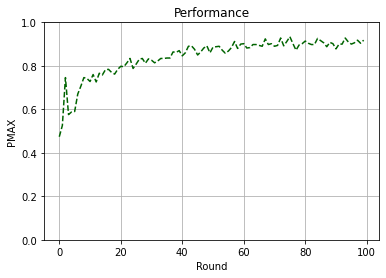

In [18]:
import matplotlib.pyplot as plt
import numpy as np 
plt.plot(range(rounds), np.mean(pmax_per_run,axis=0), color='darkgreen',
          markersize=2, linestyle='--', label='speedyIBL')
plt.xlabel('Round')
plt.ylabel('PMAX')
plt.title('Performance')
plt.ylim(0,1)
plt.grid(True)
plt.show()

## Exercise 1
Simulate the effect of the IBL model inputs in the Binary Choice
+ default_ultility of 3, noise of 0.25, and decay of 0.5
+ default_ultility of 4.4, noise of 0.5, and decay of 0.8


## Exercise 2

Build an IBL Agent using default parameter of 4.4, decay of 0.5 and noise of 0.25 for the new binary choice task. There are options: Option A or Option B.
+ One option is safe, and it yields a fixed medium outcome (i.e., 3)
+ The other option is risky, and it returns a high outcome (32) with some probability of 0.1 and a low outcome (0) with the complementary probability 0.9